# Testing different models

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Importing our clean dataset

In [20]:
%run cleanData.ipynb

In [21]:
df

,age,gender,scentLover,ecoInterest,washDishes,MrPropre,Antikal,Ariel,Dash,pods,...,likesPets,hasPet,daysSinceActivity,nbChildren,magasin,moyenneSurface,superMarket,hyperMarket,drive,hardDiscount
0,0.077922,1,0.000000,0.387479,1,-1,-1,-1,-1,-1,...,0.9,1,0.234694,0.2,-1,-1,-1,-1,-1,-1
1,0.636364,1,0.378258,0.666667,1,1,1,1,-1,1,...,0.3,-1,0.014914,0.6,-1,-1,-1,-1,-1,-1
2,0.350649,1,0.000000,0.666667,1,-1,-1,1,1,-1,...,0.9,1,0.094976,0.2,-1,-1,-1,-1,-1,-1
3,0.220779,1,0.333333,0.333333,-1,-1,-1,1,1,1,...,0.9,1,0.259812,0.4,-1,-1,-1,-1,-1,-1
4,0.259740,1,0.378258,0.000000,-1,1,1,1,1,-1,...,0.9,1,0.116954,0.0,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.454545,1,0.378258,0.387479,1,-1,-1,-1,-1,1,...,0.9,1,0.000785,1.0,-1,-1,-1,-1,-1,-1
11996,0.324675,1,0.333333,0.333333,-1,-1,-1,-1,-1,-1,...,0.9,1,0.124019,0.0,-1,-1,-1,-1,-1,-1
11997,0.311688,1,0.378258,0.666667,-1,-1,-1,-1,-1,-1,...,0.9,1,0.018838,0.6,-1,-1,-1,-1,-1,-1
11998,0.272727,-1,0.378258,0.387479,1,-1,-1,-1,-1,-1,...,0.9,1,0.197017,0.2,-1,-1,-1,-1,-1,-1


In [22]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df=clean_dataset(df)

## Model fitting

For the model fitting, we will try out the following :

* Logistic Regression
* KNeighbors
* SVC
* Naive Bayes
* Decision tree
* Random Forest
* SDG 

In [23]:
y = df.washDishes.values
x = df.drop(['washDishes'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression
accuracies = {}
lr = LogisticRegression(max_iter=250) 
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 62.72%


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 59.19%


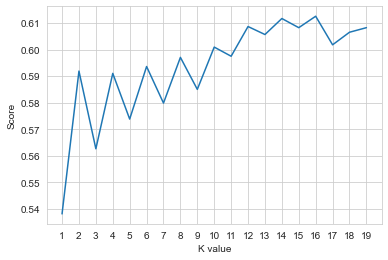

Maximum KNN Score is 61.26%


In [26]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [27]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Maximum SVM Score is {:.2f}%".format(acc))

Maximum SVM Score is 62.29%


In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 60.91%


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 54.50%


In [30]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 61.73%


In [31]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=250)
clf.fit(x_train, y_train)

acc = clf.score(x_test,y_test)*100
accuracies['SDG Classifier'] = acc
print("SDG Classifier Algorithm Accuracy Score : {:.2f}%".format(acc))

SDG Classifier Algorithm Accuracy Score : 60.05%


## Results

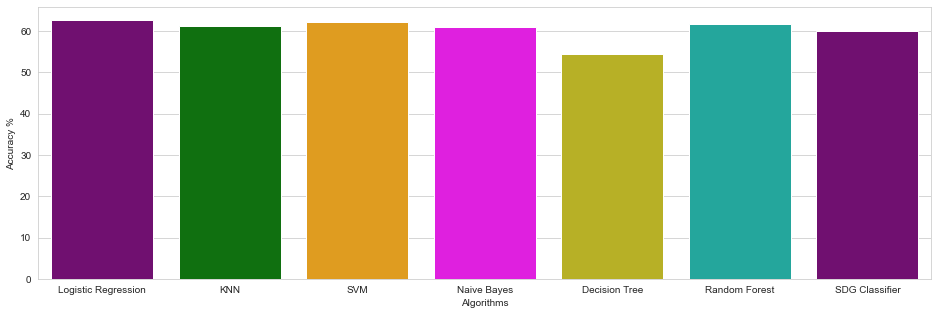

In [32]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Confusion matrix

In [33]:
# Predicted values
y_head_lr = lr.predict(x_test)
knn19 = KNeighborsClassifier(n_neighbors = 19)
knn19.fit(x_train, y_train)
y_head_knn = knn19.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)
y_head_clf= clf.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_clf=confusion_matrix(y_test,y_head_clf)

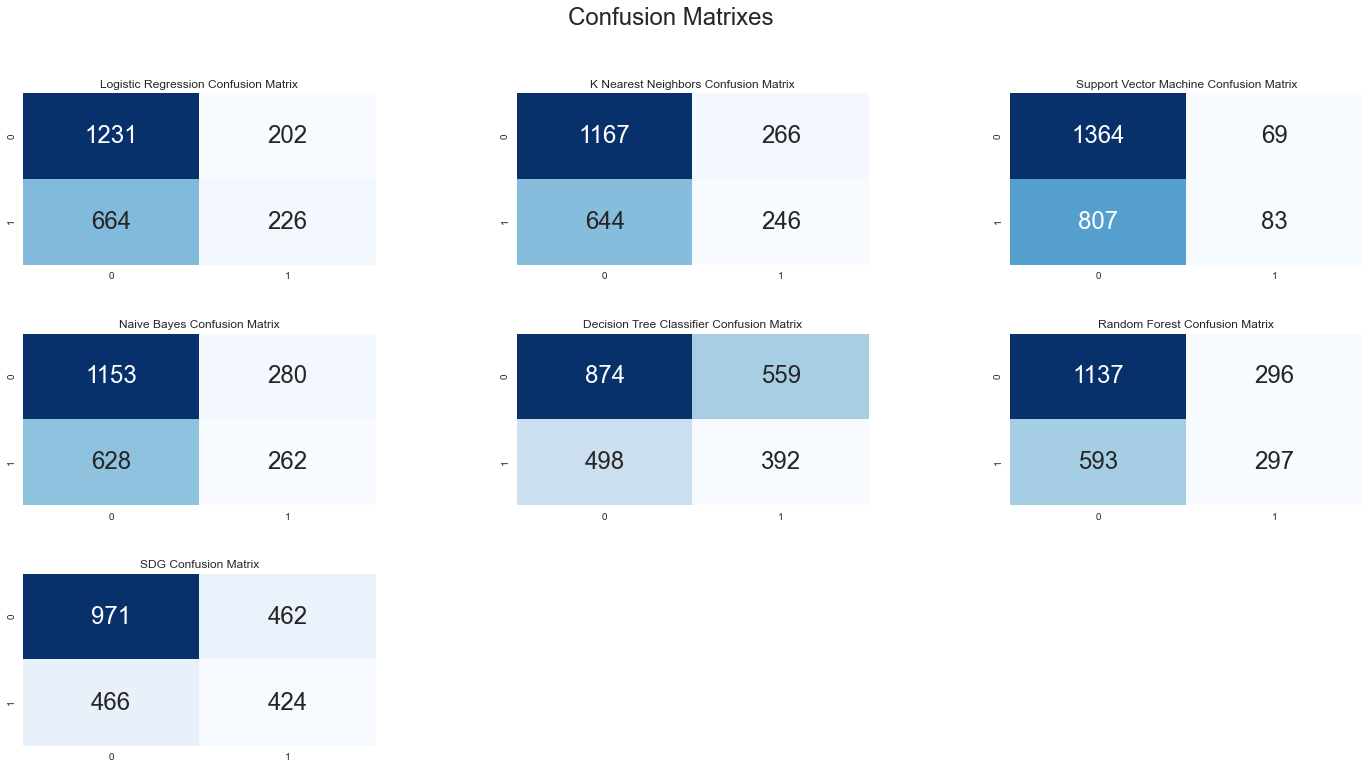

In [36]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("SDG Confusion Matrix")
sns.heatmap(cm_clf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()